In [506]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [507]:

df = pd.read_csv('../data/humans_gpt_joint_results.csv')

In [508]:
df.columns

Index(['trial_id', 'id', 'is_nsfw', 'containsNSFW', 'subject_id',
       'trial_number', 'created_at', 'experiment_name', 'prompt', 'filename',
       'filepath', 'reference', 'trial_type', 'trial_code', 'Experience',
       'imagenumber', 'choice', 'cosine', 'nvariant', 'imvariant',
       'aggregate_id'],
      dtype='object')

In [509]:
df.head(5)

,trial_id,id,is_nsfw,containsNSFW,subject_id,trial_number,created_at,experiment_name,prompt,filename,...,reference,trial_type,trial_code,Experience,imagenumber,choice,cosine,nvariant,imvariant,aggregate_id
0,66f3f6558fc41826ca81d1a1,66f3f6558fc41826ca81d1a2,False,0.0,FS_2BbT7DpAdCeXEoz,FaithfulQ2,2024-09-25T11:39:01Z,Artist_final,study tree reading a book in the library,FS_2BbT7DpAdCeXEoz_FaithfulQ2_0.png,...,stims/FaithfulQ2.png,Copying,Q2_F2_Tree_C,2.0,1.0,False,0.827304,NaN,NaN,NaN
1,66f3f6558fc41826ca81d1a1,66f3f6558fc41826ca81d1a3,False,0.0,FS_2BbT7DpAdCeXEoz,FaithfulQ2,2024-09-25T11:39:01Z,Artist_final,study tree reading a book in the library,FS_2BbT7DpAdCeXEoz_FaithfulQ2_1.png,...,stims/FaithfulQ2.png,Copying,Q2_F2_Tree_C,2.0,2.0,False,0.841419,NaN,NaN,NaN
2,66f3f6558fc41826ca81d1a1,66f3f6558fc41826ca81d1a4,False,0.0,FS_2BbT7DpAdCeXEoz,FaithfulQ2,2024-09-25T11:39:01Z,Artist_final,study tree reading a book in the library,FS_2BbT7DpAdCeXEoz_FaithfulQ2_2.png,...,stims/FaithfulQ2.png,Copying,Q2_F2_Tree_C,2.0,3.0,False,0.783962,NaN,NaN,NaN
3,66f3f6558fc41826ca81d1a1,66f3f6558fc41826ca81d1a5,False,0.0,FS_2BbT7DpAdCeXEoz,FaithfulQ2,2024-09-25T11:39:01Z,Artist_final,study tree reading a book in the library,FS_2BbT7DpAdCeXEoz_FaithfulQ2_3.png,...,stims/FaithfulQ2.png,Copying,Q2_F2_Tree_C,2.0,4.0,True,0.804217,NaN,NaN,NaN
4,66f3f6818fc41826ca81d1a6,66f3f6818fc41826ca81d1a7,False,0.0,FS_2BbT7DpAdCeXEoz,FaithfulQ3,2024-09-25T11:39:45Z,Artist_final,paradise jungle waterfall palm trees and mount...,FS_2BbT7DpAdCeXEoz_FaithfulQ3_0.png,...,stims/FaithfulQ3.png,Copying,Q3_F3_landscape_C,2.0,1.0,False,0.884395,NaN,NaN,NaN


In [510]:
exclude_trials = [
  "670cff108fc41826ca81e137", # single letter "i" as prompt
  "66fd16098fc41826ca81d7c8", # participant seems to have misunderstood the task, prompts for zuckerberg; recovers after that
  "66ffc5658fc41826ca81da98", # the "castlereate", lead and prompt merged (bug?)
  "66ffc3368fc41826ca81da84"  # participant clearly confused, asks to "add", but recovers after that
]

label_to_object = {
    "FaithfulQ2": "Tree",
    "FaithfulQ3": "Landscape",
    "FaithfulQ5": "People",
    "Aesthetics Q1": "Car",
    "Aesthetics Q2": "Cartoon",
    "Aesthetics Q3": "Penguin",
    "FaithfulQ4": "Apples",
    "FaithfulQ1": "Castle"
}

population_names = {
    'Artist_final': 'Artist',
    'Laypeople_final': 'Laypeople',
    'GPT-4o': 'GPT-4o',
}

colors = {
    'Artist': "#cc7722",
    'Laypeople': "#999999",
    'GPT-4o': "#377eb8",
}


df_ = df[~df['trial_id'].isin(exclude_trials)]
df_['Stimuli'] = df_['trial_number'].apply(lambda x: label_to_object[x])
df_['Population'] = df_['experiment_name'].apply(lambda x: population_names[x])
df_ = df_.rename(columns={'trial_type': 'Task'})

population_order = ['Laypeople', 'Artist', 'GPT-4o']
task_order = ['Copying', 'Creative']

trial_df = df_.groupby(['Population', 'Task', 'Stimuli', 'subject_id'])['cosine'].mean().reset_index()
subject_df = df_.groupby(['Population', 'Task', 'subject_id'])['cosine'].mean().reset_index()

/var/folders/nv/p5tx0nn545v9h6_w1wtm8cg00000gn/T/ipykernel_53684/640247136.py:27: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(
/var/folders/nv/p5tx0nn545v9h6_w1wtm8cg00000gn/T/ipykernel_53684/640247136.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  sns.pointplot(
/var/folders/nv/p5tx0nn545v9h6_w1wtm8cg00000gn/T/ipykernel_53684/640247136.py:27: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(
/var/folders/nv/p5tx0nn545v9h6_w1wtm8cg00000gn/T/ipykernel_53684/640247136.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  sns.pointplot(
/var/folders/nv/p5tx0nn545v9h6_w1wtm8c

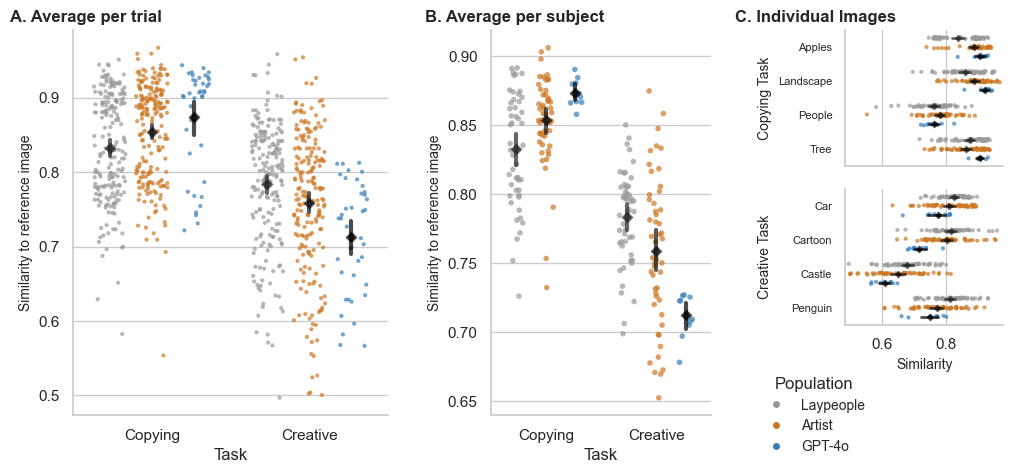

In [511]:
# Create the figure

sns.set_theme(style="whitegrid")


fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(3, 5, width_ratios=[1, 0.04, 0.7, 0.14, 0.5], height_ratios=[2,2,1], wspace=0.3, hspace=0.2)
sns.despine(bottom=True, left=True)

def swarm_with_means(data, x, y, hue, order, hue_order, size_s, alpha=0.5, jitter=0.3, ax=None, add_legend=False, markersize=2, errwidth=2):
    sns.stripplot(
        x=x,
        y=y,
        hue=hue,
        data=data,
        order=order,
        hue_order=hue_order,
        palette=colors,
        jitter=jitter,
        dodge=True,
        alpha=alpha,
        size=size_s,
        ax=ax,
        legend=add_legend,
    )

    sns.pointplot(
        x=x,
        y=y,
        hue=hue,
        data=data,
        order=order,
        hue_order=hue_order,
        color='black',
        dodge=(.8 - .8 / 3),
        markers='D',
        linestyles='',
        legend=False,
        alpha=0.7,
        markersize=markersize,
        errwidth=errwidth,
        ax=ax,
        zorder=10
    )

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


# Joint trial level plot
ax1 = fig.add_subplot(gs[:, 0])
ax1.set_title("A. Average per trial", loc='left', x=-0.2, fontdict={'fontsize': 12, 'fontweight': 'bold'})
swarm_with_means(
    data=trial_df,
    x='Task',
    y='cosine',
    hue='Population',
    order=task_order,
    hue_order=population_order,
    size_s=3,
    alpha=0.7,
    markersize=4,
    errwidth=3,
    ax=ax1,
    add_legend=True
)
ax1.set_ylabel("Similarity to reference image", fontdict={'fontsize': 10})
# hide legend
# get handles and labels
handles, labels = ax1.get_legend_handles_labels()
ax1.get_legend().remove()

# Subject level plot
ax2 = fig.add_subplot(gs[:, 2])
ax2.set_title("B. Average per subject", loc='left', x=-0.3, fontdict={'fontsize': 12, 'fontweight': 'bold'})
swarm_with_means(
    data=subject_df,
    x='Task',
    y='cosine',
    hue='Population',
    order=task_order,
    hue_order=population_order,
    size_s=4,
    alpha=0.7,
    jitter=0.2,
    markersize=4,
    errwidth=3,
    ax=ax2
)
ax2.set_ylabel(None)
ax2.set_ylabel("Similarity to reference image", fontdict={'fontsize': 10})

# shared_xlim = (trial_df['cosine'].min()-0.01, trial_df['cosine'].max()+0.01)
# ax1.set_ylim(shared_xlim)
# ax2.set_ylim(shared_xlim)

# Individual Stimuli (Task 1)
ax3 = fig.add_subplot(gs[0, 4])
# move to left
ax3.set_title("C. Individual Images", loc='left', x=-0.7, fontdict={'fontsize': 12, 'fontweight': 'bold'})
swarm_with_means(
    data=trial_df[trial_df['Task'] == 'Copying'],
    y='Stimuli',
    x='cosine',
    hue='Population',
    order=None,
    hue_order=population_order,
    size_s=3,
    jitter=0.1,
    alpha=0.7,
    ax=ax3
)

ax3.set_ylabel('Copying Task', fontdict={'fontsize': 10})
ax3.tick_params(axis='y', which='major', labelsize=8)
ax3.set_xlabel(None)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)


# Individual Stimuli (Task 2)
ax4 = fig.add_subplot(gs[1, 4])
swarm_with_means(
    data=trial_df[trial_df['Task'] == 'Creative'],
    y='Stimuli',
    x='cosine',
    hue='Population',
    order=None,
    hue_order=population_order,
    size_s=3,
    jitter=0.1,
    alpha=0.7,
    ax=ax4
)
ax4.set_ylabel('Creative Task', fontdict={'fontsize': 10})
ax4.set_xlabel('Similarity', fontdict={'fontsize': 10})
ax4.tick_params(axis='y', which='major', labelsize=8)


fig.align_ylabels([ax3, ax4])
shared_xlim = (trial_df['cosine'].min()-0.01, trial_df['cosine'].max()+0.01)
ax3.set_xlim(shared_xlim)
ax4.set_xlim(shared_xlim)

# Legend
ax_legend = fig.add_subplot(gs[2, 4])
ax_legend.axis('off')  # Hide axes completely

# Remove duplicates if needed
by_label = dict(zip(labels, handles))

for h in by_label.values():
    h.set_alpha(1)
    h.set_markersize(5)

# Create legend in the empty subplot
ax_legend.legend(
    by_label.values(),
    by_label.keys(),
    title='Population',
    loc='center',
    bbox_to_anchor=(-0.2, 0),
    frameon=False,
    fontsize=10,
    title_fontsize=12
)


fig.tight_layout(pad=0.0)
plt.savefig('figures/main_results.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/main_results.pdf', bbox_inches='tight')
plt.show()

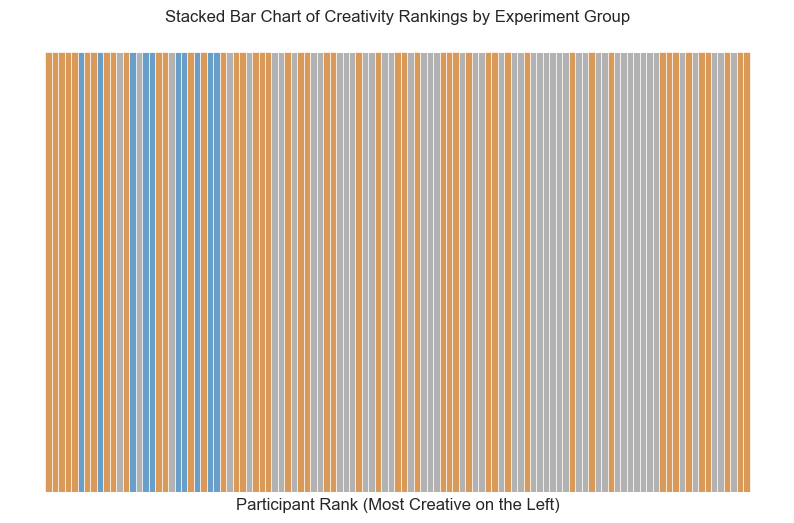

In [512]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for the "Creative" trial type
creative_df = subject_df[subject_df["Task"] == "Creative"].copy()

# Rank participants by cosine similarity (ascending order: most creative first)
creative_df = creative_df.sort_values(by="cosine", ascending=True)
creative_df["rank"] = range(1, len(creative_df) + 1)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.histplot(
    data=creative_df,
    x="rank",
    hue="Population",
    multiple="stack",
    bins=len(creative_df),  # Ensure each participant gets its own bar
    palette=colors,
    legend=False
)

plt.xlabel("Participant Rank (Most Creative on the Left)")
plt.title("Stacked Bar Chart of Creativity Rankings by Experiment Group")


# remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# remove x-axis ticks
plt.gca().axes.get_xaxis().set_ticks([])

# remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()
